In [67]:
import numpy as np
import matplotlib.pyplot as plt

In [68]:
input_dimensions = 2
hidden_neurons = 2
output_neurons = 1

np.random.seed(9)
X = np.array([[0,0],[0,1],[1,0],[1,1]], dtype=float)
Y = np.array([[1],[0],[0],[1]], dtype=float)
print("X shape : " , X.shape)
print("Y shape : " , Y.shape)
w_input = np.random.random((input_dimensions,hidden_neurons))
w_hidden = np.random.random((hidden_neurons,output_neurons))
print("w_input shape : " , w_input.shape)
print("w_hidden shape : " , w_hidden.shape)
b_h = np.random.random((1,hidden_neurons))
b_out = np.random.random((1,output_neurons))
print("b_h shape : ", b_h.shape)
print("b_out shape : ", b_out.shape)

X shape :  (4, 2)
Y shape :  (4, 1)
w_input shape :  (2, 2)
w_hidden shape :  (2, 1)
b_h shape :  (1, 2)
b_out shape :  (1, 1)


In [69]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [70]:
def sigmoidPrime(x):
    return np.exp(-x)/((1+np.exp(-x))**2)

In [71]:
lr = 0.7
E_avg = 1
i = 0
E_avg_array = np.array([])
epochs = np.array([])
while (E_avg > 0.001):
    hidden_layer_activation = np.dot(X,w_input) #+ b_h
    hidden_layer_output = sigmoid(hidden_layer_activation)
    output_layer_activation = np.dot(hidden_layer_output,w_hidden) #+ b_out
    output_layer_output = sigmoid(output_layer_activation)
    
    output_layer_error = Y - output_layer_output
    output_layer_local_gradient = output_layer_error * sigmoidPrime(output_layer_activation)
    w_hidden_delta = hidden_layer_output.T.dot(output_layer_local_gradient) * lr
    
    hidden_layer_error = output_layer_local_gradient.dot(w_hidden.T)
    hidden_layer_local_gradient = sigmoidPrime(hidden_layer_activation) * hidden_layer_error
    w_input_delta = X.T.dot(hidden_layer_local_gradient) * lr
    
    w_hidden = w_hidden + w_hidden_delta
    # b_out = b_out + np.sum(output_layer_local_gradient, axis=0, keepdims=True) * lr
    w_input = w_input + w_input_delta
    # b_h = b_h + np.sum(hidden_layer_local_gradient, axis=0, keepdims=True) * lr
    
    E = (output_layer_error**2)/2
    E_sum = E.sum()
    E_avg = E_sum / len(X)
    
    i += 1
    epochs = np.append(epochs,i)
    E_avg_array = np.append(E_avg_array,E_avg)
    #if (i == 90000):
        #E_avg = 0.0001
print(i)

32650


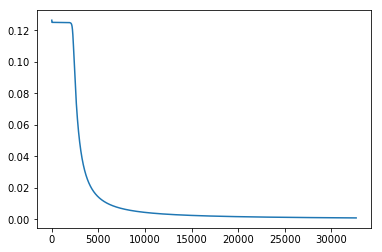

In [72]:
plt.plot(epochs,E_avg_array)
plt.show()

In [73]:
hidden_layer_activation = np.dot(X,w_input)
hidden_layer_output = sigmoid(hidden_layer_activation)
output_layer_activation = np.dot(hidden_layer_output,w_hidden)
output_layer_output = sigmoid(output_layer_activation)
print(output_layer_output)

[[ 0.98122608]
 [ 0.04491159]
 [ 0.04491156]
 [ 0.93989227]]
